Accuracy: 0.89

Confusion Matrix:
[[50  2]
 [ 7 21]]

True Positives (TP): 21
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 7

Error Rate: 0.11
Precision: 0.91
Recall: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



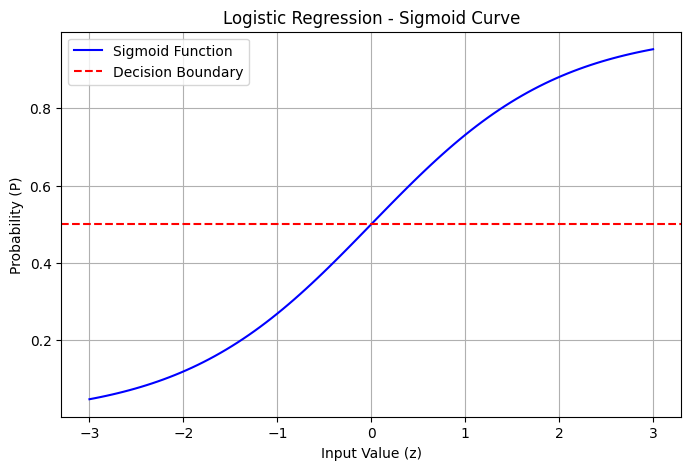

In [3]:
# Data Analytics II - Assignment 5
# Logistic Regression on Social_Network_Ads.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)

# Step 1: Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

# Step 2: Select relevant features and target variable
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 7: Compute Confusion Matrix and Derived Metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

error_rate = 1 - accuracy
precision = tp / (tp + fp) if (tp + fp) else 0
recall = tp / (tp + fn) if (tp + fn) else 0

print(f"\nError Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Step 8: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Sigmoid Function Plot (for explanation)
X_range = np.linspace(-3, 3, 100)
sigmoid = 1 / (1 + np.exp(-X_range))

plt.figure(figsize=(8, 5))
plt.plot(X_range, sigmoid, label="Sigmoid Function", color="blue")
plt.axhline(y=0.5, color='red', linestyle='--', label="Decision Boundary")
plt.xlabel("Input Value (z)")
plt.ylabel("Probability (P)")
plt.title("Logistic Regression - Sigmoid Curve")
plt.legend()
plt.grid(True)
plt.show()